In [1]:
from __future__ import print_function

In [17]:
length = 10

h_tm2 = 0
h_tm1 = 1


seq = [h_tm1]

In [18]:
def step(h_tm1, h_tm2):
    h_t = h_tm1 + h_tm2
    return h_t, h_tm1


for i in range(length):
    h_tm1, h_tm2 = step(h_tm1, h_tm2)
    seq.append(h_tm1)
    
print(seq)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


In [19]:
from theano import tensor as T, scan, function

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [22]:
h1, h2 = T.scalars('h_tm1', 'h_tm2')

def _step(h_tm1, h_tm2):
    h_t = h_tm1 + h_tm2
    return h_t, h_tm1

In [23]:
outputs, updates = scan(_step, sequences=[], outputs_info=[h1, h2], n_steps=length)

In [26]:
F = function([h2, h1], outputs[1])

In [36]:
[int(F(0,1)[i]) for i in range(len(F(0,1)))]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from theano import tensor as T, function, scan

In [43]:
X = T.tensor3('X')
W, U, init_h = T.matrices('W_xh', 'W_hh', 'init_h')
b = T.vector('b')

#  h_t = tanh(W*x_t + U*h_tm1 + b)
def step(Wx_t, h_tm1, U):
    h_t = T.tanh(Wx_t + T.dot(h_tm1, U))
    return h_t

Wx = T.dot(X, W) + b
Wx = Wx.dimshuffle(1, 0, 2)

outputs, updates = scan(step, sequences=Wx, outputs_info=init_h, non_sequences=U)

In [45]:
F = function([X, init_h, W, U, b], outputs)

In [53]:
time = 100
batch = 500
dim = 20
hidden_dim = 30

xx = np.random.randn(batch, time, dim)
hh = np.zeros((batch, hidden_dim))
ww = .1 * np.ones((dim, hidden_dim))
uu = .1 * np.ones((hidden_dim, hidden_dim))
bb = np.random.normal(0, .1, hidden_dim)

y = F(xx, hh, ww, uu, bb)

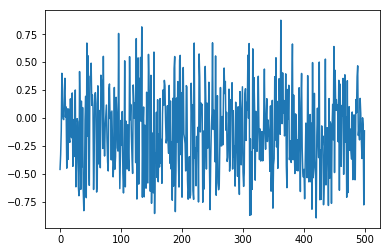

In [54]:
plt.plot(y[0,:,0])